# Time Series Forecasting on COVID-19 in US, UK and Chile

In the current project we will analyze exhaustively and compare the underlying temporal patterns from sequential historical observations about the COVID-19 pandemic in 3 nations, specifically we will focus on 3 key features: New cases, new deaths and percentage of vaccinated people. 

Before describing deeper the goals I have to talk about the dataset used as it corresponds to the offered publicly by the organization "Our World in Data" which in collaboration with The University of Oxford have developed a reliable repository of datasets about dozens of topics focusing on those big problems which affect the world. This is why since the beginning of COVID-19 outbreak several researchers have been collecting data from every country in the world about multiple indicators which can make us take better decisions, what is more amazing is the fact that this dataset offered is updated every day for all countries allowing people to keep track of it.

The main goal of this project is to build a deep learning model considering all daat available in order to forecast the behaviour in the "future days" opening the possibility of backing up our desicions or next steps in the responsibility of keep safe our community. As every other Time Series task it implies analyzing deeply the plots as they could behave as a typical linear system which has a response given an input or "perturbation". Obviously this data does not work as other topics we are used to deal with, such as: Stock market, price, sales, budget, weather, etc. The data about this specific topic can be sometimes so uncertain that even the most proper and powerful statistic model can fail and forecasting changes to be significatively more influenced by empirical evidence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import numpy as np

Read the csv file and display the first 5 instances: 

In [2]:
data=pd.read_csv('../input/covid19-dataset/owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Let us see the columns , their type and how many non-null values they contain, these numbers of non-null values means that some features couldn't be gathered from countries or were not available.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160934 entries, 0 to 160933
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    160934 non-null  object 
 1   continent                                   151277 non-null  object 
 2   location                                    160934 non-null  object 
 3   date                                        160934 non-null  object 
 4   total_cases                                 158046 non-null  float64
 5   new_cases                                   158016 non-null  float64
 6   new_cases_smoothed                          156865 non-null  float64
 7   total_deaths                                140413 non-null  float64
 8   new_deaths                                  140587 non-null  float64
 9   new_deaths_smoothed                         140457 non-null  float64
 

In the column 'location' we can filter out the contries we want to gather, but firstly let's print the unique instances in such column so as to know how are named each country:

In [4]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Nice! above we see how some countries are named by their acronyms and others do not, if we choose one country in particular we can see it displays a good number of rows, those correspond to the dates comprehending the first day when the patient zero appear in the country until present day:

In [5]:
data[data['location']=='Chile']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
29795,CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,205.0,1.3,-3.54,10.670213
29796,CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
29797,CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
29798,CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
29799,CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30509,CHL,South America,Chile,2022-02-06,2371833.0,36799.0,33441.429,39987.0,57.0,43.286,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30510,CHL,South America,Chile,2022-02-07,2405672.0,33839.0,34241.143,40060.0,73.0,48.429,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30511,CHL,South America,Chile,2022-02-08,2431845.0,26173.0,34469.143,40087.0,27.0,50.571,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30512,CHL,South America,Chile,2022-02-09,2466098.0,34253.0,34974.571,40111.0,24.0,52.714,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN


Before analyzing in deep the three countries we will do some analysis related to the behaviour of the pandemic in the entire world since the first day of 2020 to present day by adding up the numbers collected from all countries grouped by date.

**Plot of new cases and new deaths in entire world**

Text(0, 0.5, 'New cases')

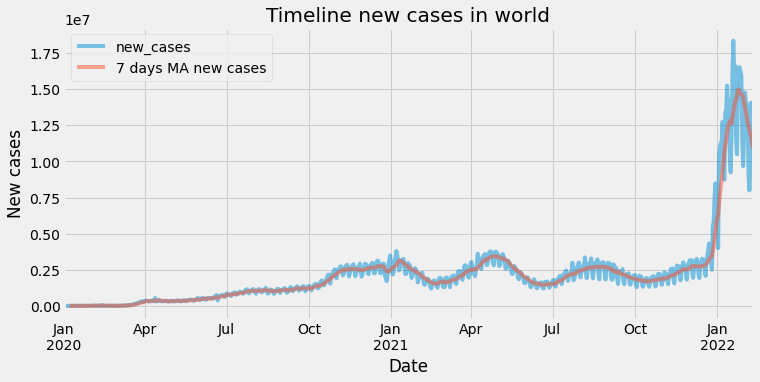

In [6]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').sum()
data2['7 days MA new cases'] = 0
data2['7 days MA new cases'] = data2['new_cases'].rolling(7).mean() #Moving average of new cases with window=10
data2['7 days MA new deaths'] = 0
data2['7 days MA new deaths'] = data2['new_deaths'].rolling(7).mean()  #Moving average of new deaths with window=10

data2[['new_cases', '7 days MA new cases']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')

In the chart above we can clearly see the 4 waves that affected the entire world, the original variant, beta, delta and omicron. This current variant has become the dominant one by far, its peak is over 4 times higher than former peak which corresponds to variant beta wave, this phenomena occurs mainly because as Dr. Tom Frieden says: *It's as infectious as measles spreading in a non-immune population, with a much shorter incubation time therefore much faster doubling time* or as in the journal EL PAIS USA says in the first sentence: *Omicron is the fastest-spreading virus known to humankind*, which was supported by the following fragment of the details that Epidemiologist William Hanage gave: *Omicron is certainly the most rapidly spreading virus among the ones we have been able to investigate at this level of detail.* 

There is a dataset including the distribution of variants in every country sorted by date, in this we can see how omicron has wiped out other variants, unfortunately this dataset is under an exclusive license and the publisher only allows visualising it, below is a link to such chart with a time slider, I kindly invite you to see it in detail:

https://ourworldindata.org/grapher/covid-variants-bar?time=2022-01-19&country=AUS~GBR~USA~BEL~ITA~FRA~ESP~DEU~BWA~ZAF~CAN

We can add hundreds of publications about this last wave however what is taking the attention and making specialist to track continously this variant is the number of deaths because since the beggining of this wave the number of deaths has increased considerably and its current peak is significatively lower than previous waves as can be seen below.



Text(0, 0.5, 'New deaths')

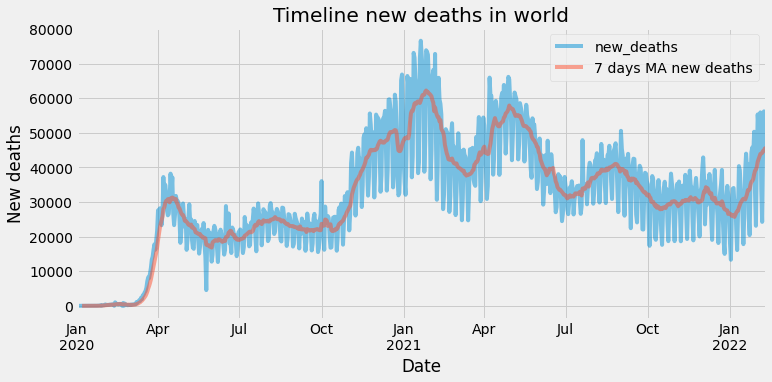

In [7]:
data2[['new_deaths', '7 days MA new deaths']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new deaths in world')
plt.xlabel('Date')
plt.ylabel('New deaths')

At the beginning of the current wave we saw a relatively small increase in the curve of new deaths has made specialist to formulate a huge amount of hypothesis outstanding the *Is Omicron less severe than earlier variants?*, no matter what could say publications the world-wide health authorities are endorsing to keep following the recommendations to prevent get infected because all of these experiments are still in development. However the following fragment was taken from a publication of BBC News in January 14th and says: 

*There is now high confidence that Omicron is relatively mild for most adults, says the UK Health Security Agency in its latest risk assessment. This is largely thanks to vaccines providing high protection against serious illness caused by this latest Covid variant that is infecting many.*

Obviously the main purpose of the vaccines is exactly that, but we all know or at least have an idea of some countries which are still having problems to get access to vaccines, this is why in this project we have selected three powerful nations that have been pioneers in the COVID-19 fight, thus the behaviour of the pandemic in these could make their strategies a template to follow by "less-developed countries" in order to tackle down this disease with more centainty.

**Analysis of COVID-19 in UK, USA and Chile**

From the dataset we will gather the following features for the three countries: 
- date
- total_cases 
- new_cases
- total_deaths
- new_deaths
- people_vaccinated_per_hundred
- people_fully_vaccinated_per_hundred
- new_deaths_per_million
- new_cases_per_million

Once we selected them we have to create new features based on the current ones such as the moving average for new_cases, new_deaths, new_deaths_per_million
and new_cases_per_million because these have sudden peaks which occur for typical mistakes in the counting, non-working days, massive testing, etc. finally three interesting plots will be displayed. Nevertheless is the fact that it would be much more nice if we build a function that asks for the dataframe and the country and returns the processed dataframe while plotting making the analysis faster.

*Due to a mistake in chilean data we must change it manually, the date when it happened was October 7th 2021, where new amount of deaths increased to 37533, as trustworthiness is a must the next link is the official report by health authorities in such day:*

https://www.minsal.cl/reporte-covid-19-se-registran-981-nuevos-casos-y-una-positividad-de-151/

*Something similar happened to UK's data, where the new cases and new deaths values were misssing for January 31st and February 1st. Researching deeply to find the actual values for both dates I have found a mismatch between ourworldindata.com and the uk government official webpage, I absolutely encourage you to go and compare the values, obviously we should have to consider the values managed by the government, however the values given by ourworldindata.com are used by Google and world-wide agencies which are keeping track on this pandemic. The next link is the official report by health authorities in such day:*

https://coronavirus.data.gov.uk/details/deaths




In [8]:
def create_and_plot_df(df, country):
    #Selecting the 7 key columns for country in dataset
    df=df[df['location']==country].copy()
    df=df[['date','total_cases','new_cases',
         'total_deaths','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()

    #Convert to datetime
    df.date = pd.to_datetime(df['date'])

    #Fixing the mistakes in chilean data.
    if country=='Chile':
        df.loc[df['date']=='2021-10-07','total_deaths'] = 37533
        df.loc[df['date']=='2021-10-07','new_deaths'] = 21
        df.loc[df['date']=='2021-10-08','new_deaths'] = 9
        df.loc[df['date']=='2021-10-07','new_deaths_per_million'] = 1.092
        df.loc[df['date']=='2021-10-08','new_deaths_per_million'] = 0.468
    else:
        pass
  
    #Fixing the mistakes in uk data.
    if country=='United Kingdom':
        df.loc[df['date']=='2022-01-31','new_cases'] = 92368
        df.loc[df['date']=='2022-02-01','new_deaths'] = 219
        df.loc[df['date']=='2022-01-31','new_cases_per_million'] = 1354
        df.loc[df['date']=='2022-02-01','new_deaths_per_million'] = 3.211
    else:
        pass
  
    #Set the date as index and compute moving average with window=7 for new_cases and new_deaths
    df.set_index('date', inplace=True)
    df['7 days MA new cases'] = 0
    df['7 days MA new cases'] = df['new_cases'].rolling(7).mean()
    df['7 days MA new deaths'] = 0
    df['7 days MA new deaths'] = df['new_deaths'].rolling(7).mean()
    df['7 days MA new cases per million'] = 0
    df['7 days MA new cases per million'] = df['new_cases_per_million'].rolling(7).mean()
    df['7 days MA new deaths per million'] = 0
    df['7 days MA new deaths per million'] = df['new_deaths_per_million'].rolling(7).mean()
  
    #Plot new cases, new deaths and people vaccinated 
    df[['new_cases', '7 days MA new cases']].plot(figsize = (15, 5), alpha = 0.5)
    plt.title(f'Timeline new cases in {country}')

    df[['new_deaths', '7 days MA new deaths']].plot(figsize = (15, 5), alpha = 0.5)
    if country=='Chile':
        plt.ylim([0,400])
    else:
        pass
    plt.title(f'Timeline new deaths in {country}')

    df[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].plot(figsize = (15, 5), alpha = 0.5)
    plt.ylim([0,100])
    plt.fill_between(df.index, df.people_vaccinated_per_hundred)
    plt.fill_between(df.index, df.people_fully_vaccinated_per_hundred)
    plt.title(f'Timeline percentage of people vaccinated in {country}')
  
    #Return the dataframe processed
    return df

Time now to use the function just built to analyze each country:

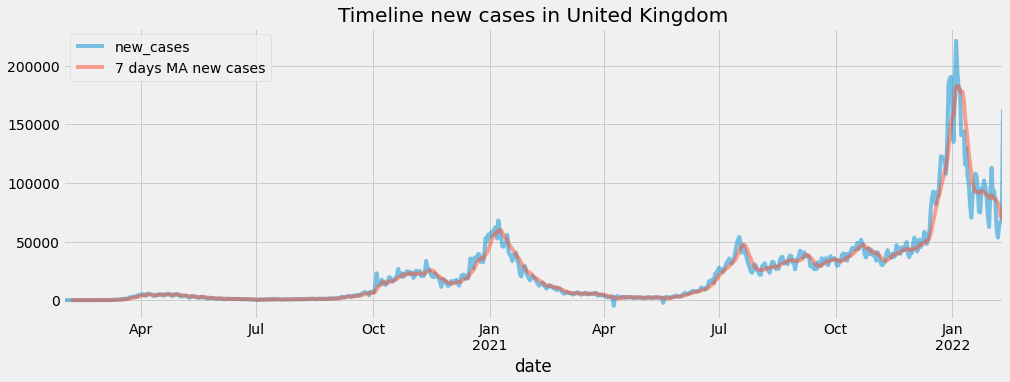

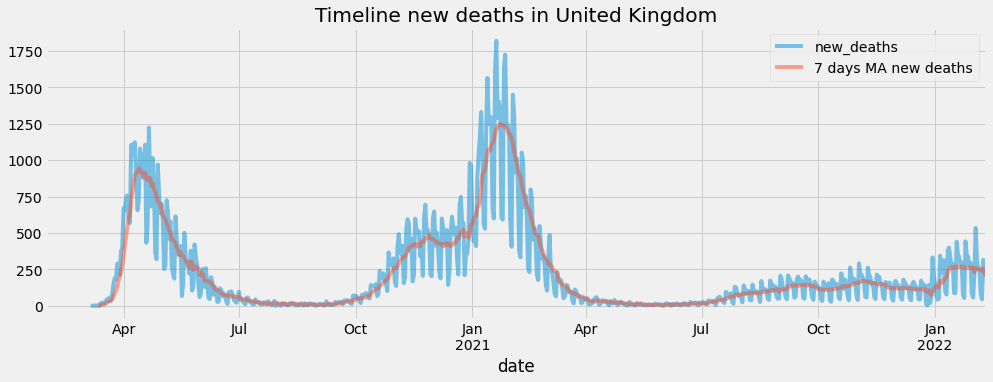

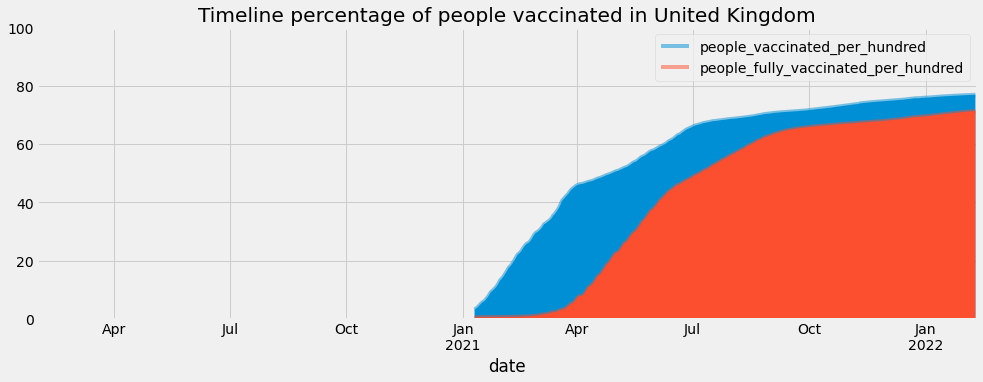

In [9]:
df_uk=create_and_plot_df(data, 'United Kingdom')

In [ ]:
#df_uk

The most impressing feature about the first chart is the rapid decay in number of cases whilts the curve of new deaths seems to be settled down and up to date seems that it corresponds to the wave with less severity and the biggest hypothesis of this fact are the vaccines, in order to endorse this let's look more in depth the curves in around January 2021, we can see the vaccination process started and as more people got vaccinated make the number of new cases and new deaths to plummet, specifically in April those numbers were unprecedentedly low and the people vaccinated with first dose was little lower than 50%. This is why the number of deaths did not rocket despite omicron has become the most infectious disease ever recorded, as Sir. David Spiegehalter said: *There's still no sign of a serious increase in intensive care ventilation and deaths and we would have expected to see that by now.*

Dr. Rahul Sharma: *We are seeing an increase in the number of hospitalizations, but the severity of the disease looks different from previous waves. We're not sending as many patients to the ICU. Actually most of our patients that are 
coming to the emergency department that do test positive are actually being discharged. Cases are not transposing into hospitalizations the way previous variants did.*

Another important detail to take into account is that the first reported cases of omicrom was in South Africa in early-December and interestingly has been declining continuosly just like in the UK, Dr. John Campbell says: *The pattern of new cases in UK is closely mirroring the south african pattern 3-4 weeks ago.* Effectively in the South African curve we see how it dropped extremely quick in comparison to the three previous waves.

Something outstanding in the UK and US patterns is the huge ripple in the curves, we can see the number goes up and down extremely quick, which is at least curious because in general there are 14 waves during 3 months, this almost match with the number of weeks. The most worrying curve is the number of new deaths, because it's strange that such number goes up and down so violet every week, I can suspect of a wrong way of counting or definitely something is not fair, this is just an early hypothesis.

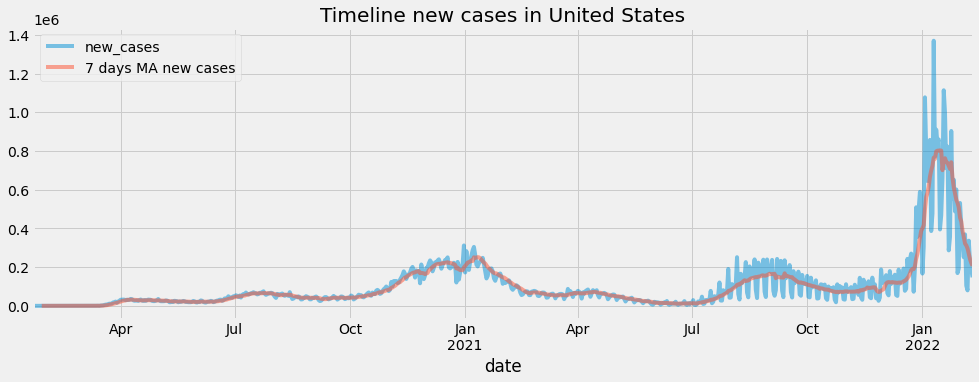

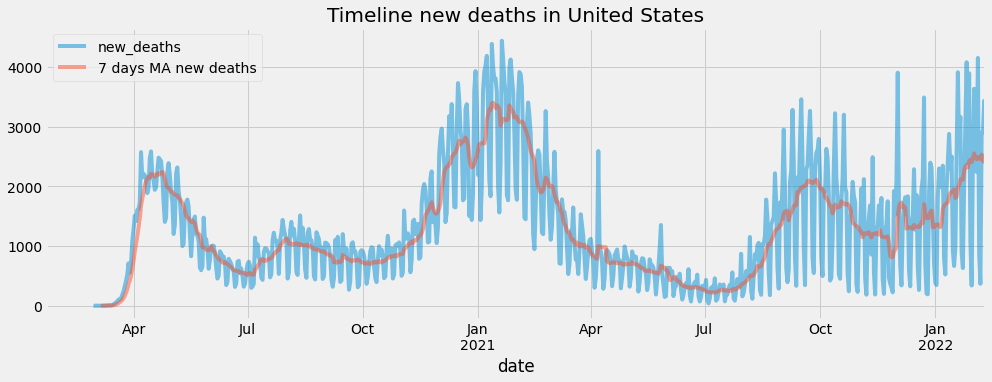

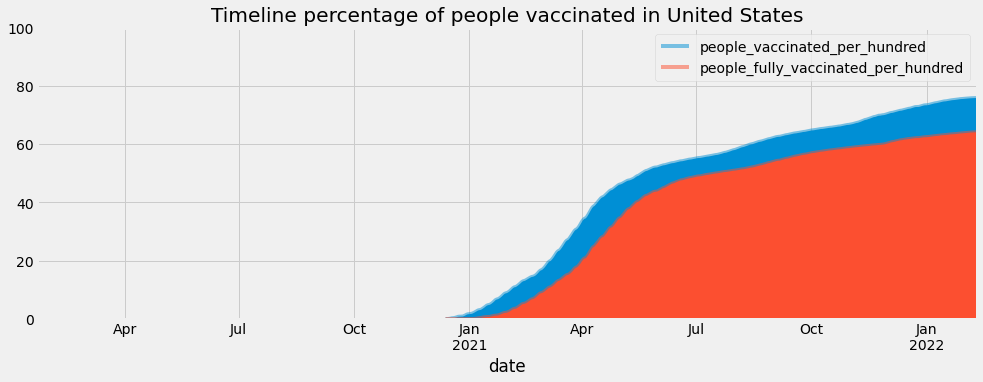

In [10]:
df_us=create_and_plot_df(data, 'United States')

In [ ]:
#df_us

By looking the first chart we can early say that it's following the UK pattern about omicron variant and obviously there is sort of shift in date when is happens, ironically the UK has become a kind of future behaviour. Just a couple of days ago in January 10th the number of new cases in the USA was over the 1.3 million being almost 5 times higher than previous peak and way different to the UK is the number of deaths because it has increased considerably even surpassing the delta peak. The following was extracted from the analysis of Dr. John Campbell: *The US may be surpassing its peak and by the end of january the curve should have to be settled down. The reason of the rocketing in new cases in the US can be partly for the low vaccination rates, comorbidities, residual circulation of delta and post delta infection.*

The situation in the US is very worrying because in other charts from exclusive datasets we can see the number of hospitalizations nowadays has equalized the historic peak which was around Dec 2020/Jan 2021. Personally I think there is no doubt the efficiency of vaccines as the increase in number of cases and deaths are explanied by the evident low vaccination rate, up to date only 75% of people got first dose and 63% got two doses, which are considerably lower compared to the UK, this gap in percentage may seem small but if we translate to number of people it's hugely bigger.

Let us show a couple more references that Dr. John Campbell highlighted:

Vineet Arora (Hospitalist): *We have a lot of chronically ill people in the US, and it's like all of those people are now coming to the hospital at the same time.*

Craig Spencer (Emergency physician): *The health-care system is in crisis and on the verge of collapse.*


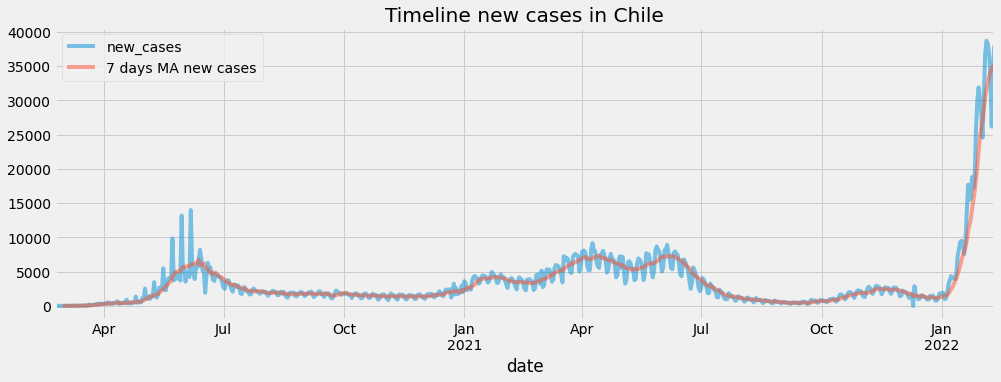

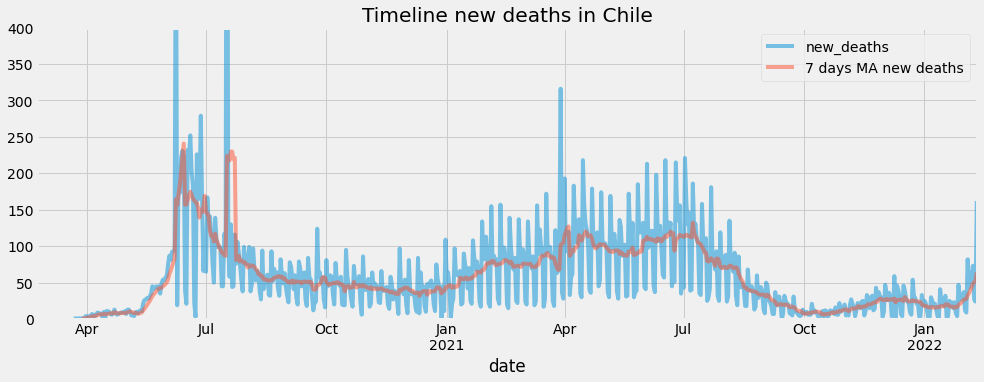

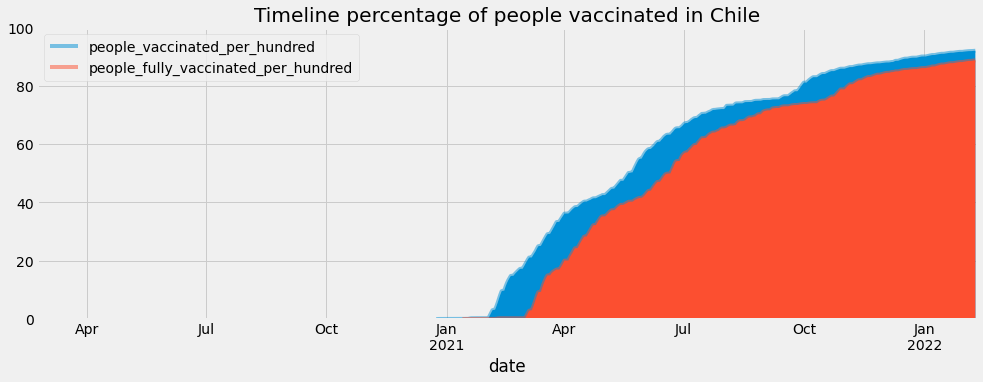

In [11]:
df_chile=create_and_plot_df(data, 'Chile')

In [12]:
df_chile

,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_deaths_per_million,new_cases_per_million,7 days MA new cases,7 days MA new deaths,7 days MA new cases per million,7 days MA new deaths per million
date,,,,,,,,,,,,
2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.104,NaN,NaN,NaN,NaN
2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-06,2371833.0,36799.0,39987.0,57.0,91.90,88.55,2.967,1915.381,33441.428571,43.285714,1740.620143,2.253000
2022-02-07,2405672.0,33839.0,40060.0,73.0,91.95,88.64,3.800,1761.314,34241.142857,48.428571,1782.245143,2.520714
2022-02-08,2431845.0,26173.0,40087.0,27.0,92.00,88.72,1.405,1362.300,34469.142857,50.571429,1794.112571,2.632143


Chile, the country where I live once had the highest vaccination rate in the world and people did not refuse to get the vaccines, this is why 92% of people got the first dose and 89% got two doses, the success of the vaccination process made the number of new deaths by omicron variant settle down nowadays, whereas the number of new cases has absolutely rocketed and is highly likely that currently it is reaching the peak. Comparing with the UK and USA the new cases curve had a similar behaviour, later we will see them per million in order to compare them better, another very important behaviour is the new deaths curve because it remained low endorsing once again the efficiency of the vaccine to resist new waves and keep low the new deaths rate.

In the next days we could expect the curve of new cases will plummet even faster than in the UK. Nonetheless is the fact that now Chile is in summer season and as the Climate and the spread of COVID-19 report in nature.com says: Countries are expected to see a decline in new COVID-19 cases during summer and a resurgence during winter. However I must inform that a considerably percentage of people are on vacations now and health authorities obligate people to get tested and submit the negative result in order to travel or have vacations, this has made COVID testing agencies to collapse as an unprecedented amount of people want to get tested, this without a doubt has increased the number of new cases reported, finally people are restarting to live with less restrictive measures and not always following all recommendations to prevent get infected.

**Comparison of the three countries in cases per million and deaths per million**

Let's create a new dataframe containing the two features of each country and indexed by date as follows:

In [17]:
df3_countries=pd.DataFrame()
df3_countries['New cases per million uk'] = df_uk['7 days MA new cases per million']
df3_countries['New cases per million us'] = df_us['7 days MA new cases per million']
df3_countries['New cases per million chile'] = df_chile['7 days MA new cases per million']
df3_countries['New deaths per million uk'] = df_uk['7 days MA new deaths per million']
df3_countries['New deaths per million us'] = df_us['7 days MA new deaths per million']
df3_countries['New deaths per million chile'] = df_chile['7 days MA new deaths per million']
df3_countries['date'] = df_uk.index
df3_countries.set_index('date', inplace=True)

df3_countries.head()

,New cases per million uk,New cases per million us,New cases per million chile,New deaths per million uk,New deaths per million us,New deaths per million chile
date,,,,,,
2020-01-31,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-01,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-02,NaN,0.001286,NaN,NaN,NaN,NaN
2020-02-03,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-04,NaN,0.002571,NaN,NaN,NaN,NaN


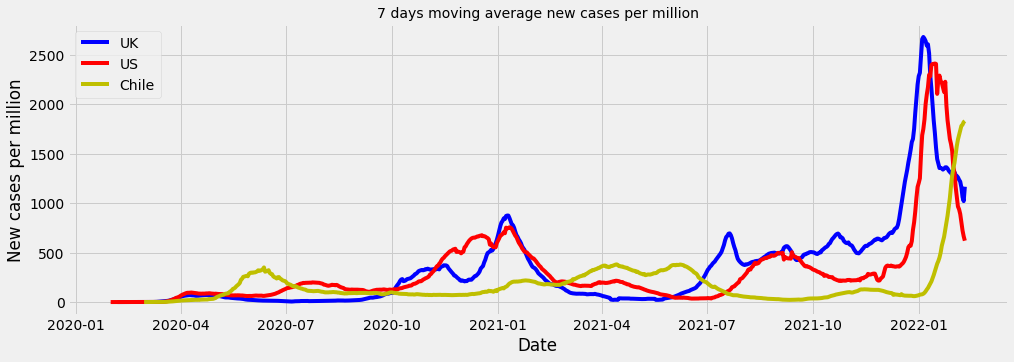

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df3_countries.index, df3_countries['New cases per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New cases per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New cases per million chile'], "-y", label="Chile")
plt.legend(loc="upper left")
plt.title("7 days moving average new cases per million",fontsize=14)
plt.ylabel('New cases per million')
plt.xlabel('Date')
plt.show()

In the above chart we see the three curves have a little similar patterns, but shifted in time as we said, Chile is increasing following the UK's curve and according to the season, the most impactful segment of this is after July 2021, because there was an inflection point while the UK and USA increased their cases Chile stayed low until the omicron spread.

One interesting way to quantify the meaning of these curves is area under the curve and this corresponds to the number of cases per million in the entire pandemic era, in other words, number of cases per million acummulated or added up.

In [19]:
print('AUC New cases per million in the UK: ', df3_countries['New cases per million uk'].sum())
print('AUC New cases per million in the US: ', df3_countries['New cases per million us'].sum())
print('AUC New cases per million in Chile: ', df3_countries['New cases per million chile'].sum())

AUC New cases per million in the UK:  251806.26614285714
AUC New cases per million in the US:  230869.70871428575
AUC New cases per million in Chile:  125003.97185714285


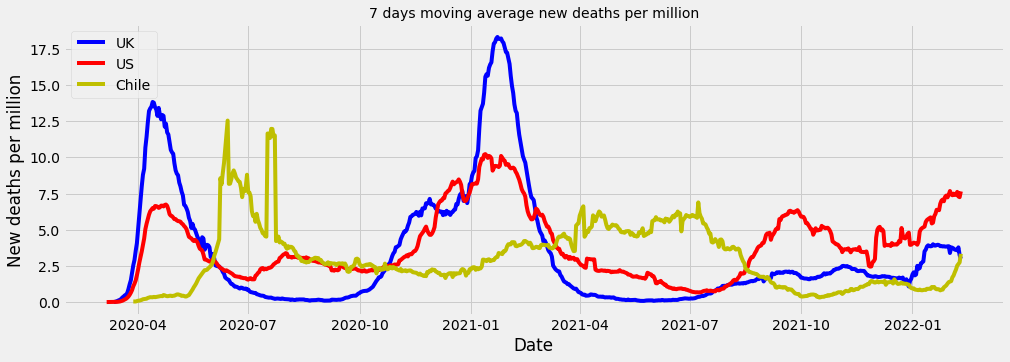

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(df3_countries.index, df3_countries['New deaths per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New deaths per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New deaths per million chile'], "-y", label="Chile")
plt.legend(loc="upper left")
plt.title("7 days moving average new deaths per million",fontsize=14)
plt.ylabel('New deaths per million')
plt.xlabel('Date')
plt.show()

In [21]:
print('AUC New deaths per million in the UK: ', df3_countries['New deaths per million uk'].sum())
print('AUC New deaths per million in the US: ', df3_countries['New deaths per million us'].sum())
print('AUC New deaths per million in Chile: ', df3_countries['New deaths per million chile'].sum())

AUC New deaths per million in the UK:  2312.9045714285717
AUC New deaths per million in the US:  2724.764142857143
AUC New deaths per million in Chile:  2084.1855714285707


We can not say that the curves are similar for this chart as previously, because for certain periods Chile surpasses both curves following a pattern shifted in time again, since August 2021 there is an inflection point turning the position of the curves being Chile the lowest and USA the highest during the peak of the third wave.

The relative decrease in the number of deaths and its high correlation with the vaccines recieved sparked the hypothesis of giving even more doses so as to prevent another wave either in new cases or new deaths, however as Dr. Marco Cavaleri says: *The repeated use of vaccinations (boosters) will actually reduce the quality of the inmune response. Boosters can be done once, or maybe twice, but it's not something that we can think should be repeated constantly.*

In parallel multiple specialist think we are coming into a new covid-era, where Omicron is going to become endemic at least in the few seasons. Common colds, influenza, HIV, measles, malaria and tuberculosis are known for being currently endemic diseases.

Endemic does not mean not severe, it's present all the time and pops up time to time. Prof. Eleanor Riley says: *When omicron has finished and moved through, immunity in the UK will be high, at least for a while.*

This doubtful and uncertain context is a serious state and authorities must use all tools, advices, evidence and experience available in order to take the best possible desicions to keep safe the population and be one step further to wake the economy and accomplish the main goals. Here we as Data Scientist have a big protagonism for being the professionals who can deal with complex machine learning models to support and solve these doubts.

The next milestone corresponds to building a model which allows us to forecast the future values for each indicator or feature considered in our analysis, such predictions have a level of uncertainty which is increasing as we go further, however I have developed a model with very interesting predictions to analyze:

# Modeling and Forecasting 

The model contains two SimpleRNN layers and 3 Dense layers trained with Adam optimizer for 100 epochs. I really encourage you to see the following notebook in which I explain more about this model and why I choose this one instead of others/different architecture:

https://www.kaggle.com/georgesaavedra/time-series-forecasting

In this project we will focus on the "moving average of new number of cases", but you will get convinced later that given the high confidence of the model and match of actual and predicted values will make us adapt the processes taken to predict other features.



In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_log_error
from keras.layers import SimpleRNN
import statistics
from tensorflow.keras.optimizers import Adam

In order to make this process much more easy and adaptable to each country we want to analyse we will create a function which recieves the name and dataframe of the country and builds the model, in the cell below I detail every step considered and a short explanation of them.

In [23]:
def build_model(country_data, name_country):
  #Select the proper column and rows after 6 or 7 depending of the country: 
  new_df=country_data['7 days MA new cases']
  if name_country == 'USA':
    new_df=new_df[7:].copy()
  else:
    new_df=new_df[6:].copy()
  
  #Define the window of the RNN model and training set at 80%:
  window=10
  train_len = math.ceil(len(new_df)*0.8)
  train_data = new_df[0:train_len]
  X_train=[]
  Y_train=[]
  for i in range(window, len(train_data)):
      X_train.append(train_data[i-window:i])
      Y_train.append(train_data[i])
  
  X_train, Y_train= np.array(X_train), np.array(Y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  #Define validation set at remaining 20%
  test_data = new_df[train_len-window:]
  X_val=[]
  Y_val=[] 
  for i in range(window, len(test_data)):
      X_val.append(test_data[i-window:i])
      Y_val.append(test_data[i])

  X_val, Y_val = np.array(X_val), np.array(Y_val)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

  #Build the RNN network and train with proper set: 
  r1=[]
  r2=[]
  model=Sequential()
  model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
  model.add(Dense(100))
  model.add(Dense(25))
  model.add(Dense(1))
  opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
  model.compile(loss='mean_squared_error', optimizer=opt1)
  model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

  #Predict the label for train and validation sets, then compute RMSLE for both:
  lstm_train_pred = model.predict(X_train)
  lstm_valid_pred = model.predict(X_val)
  lstm_train_pred[lstm_train_pred<0] = 0    #As we will compute logaritmic the argument must be greater or equal to 0
  lstm_valid_pred[lstm_valid_pred<0] = 0
  print('RMSLE train set: ', np.round(np.sqrt(mean_squared_log_error(Y_train, lstm_train_pred)),3))
  print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(Y_val, lstm_valid_pred)),3))
    
  #Create new dataframe including actual validation data and predicted validation:
  valid = pd.DataFrame(new_df[train_len:])
  valid['Predictions'] = model.predict(X_val)

  #Plot the both curves:
  plt.figure(figsize=(16,8))
  plt.title(f'Validation and predicted values by RNN model in {name_country}')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.plot(valid[['7 days MA new cases','Predictions']])
  plt.legend(['Validation','Predictions'])
  plt.show()

  #Return the new dataframe without NaN values, the model built and validation dataframe:
  return new_df.copy(), model, valid

Now the function to forecast future values given the dataframe and the model built:

In [24]:
def future_values(model, future_df, days, name_country):
  #Loop for number of "days" to forecast:
  for i in range(1,days+1,1):
    #Take the last 10 days from the dataframe:
    last_10_days=future_df[-10:].values
    X_test=[]
    X_test.append(last_10_days)
    X_test=np.array(X_test)
    #Reshape properly to be used by the model:
    X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
    #Predict the one day in future given 10 days:
    pred_new_cases=model.predict(X_test)
    #Create the date for the forecasted value:
    idx = pd.date_range(future_df.index[-1], periods=2, freq='D')[1:]
    #Append such value to the actual dataframe and use this new dataframe to compute a new future value:
    future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
  
  #Plot the up to date values in blue and forecasted values in red:
  plt.figure(figsize=(16,8))
  plt.title(f'Historic values and forecasting of future values in {name_country}')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.plot(future_df[:-days])
  plt.plot(future_df[-days:])
  plt.legend(['Historic values','Forecast'])
  plt.show()
 
 #Return the created dataframe including actual validation values and forecasted values.
  return future_df

Let's use the function created to model and forecast the new number of cases for the UK, USA and Chile:

In [25]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## UK

The function below will print the actual validation set in blue and predicted validation set in red, we see how both curves are very similar and the RMSLE for both sets is significatively low meaning a high confidence:

RMSLE train set:  0.066
RMSLE validation set:  0.025


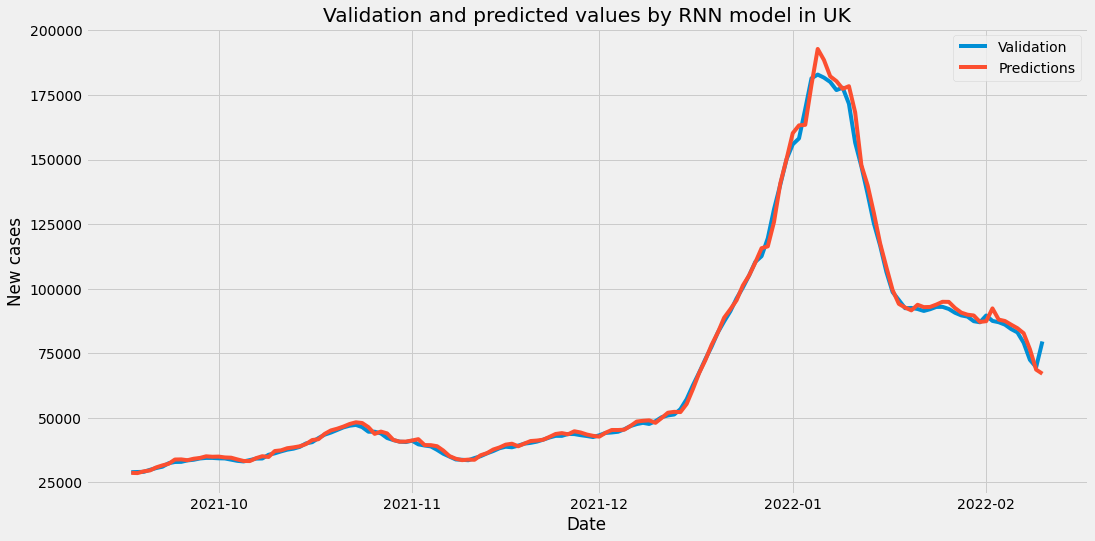

In [60]:
df_uk_cut, model_uk, valid_df_uk = build_model(df_uk, 'UK')

Now what we have been waiting for, forecast the number of new cases in the following 10 days:

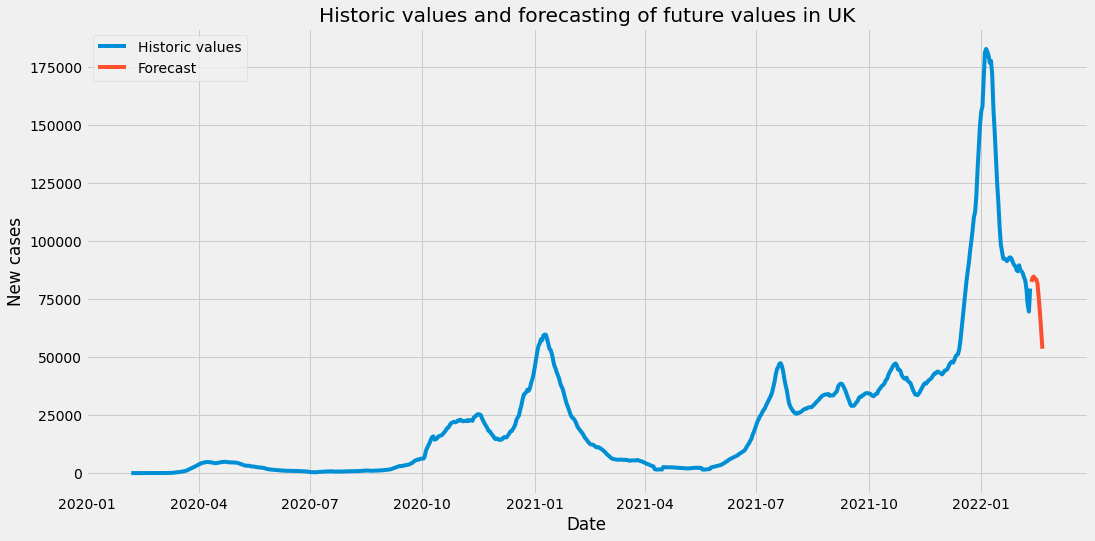

In [56]:
forecasting_uk = future_values(model_uk, df_uk_cut, 10, 'UK')

We can see the line will continue going down slowly, this could be due to Omicron BA.2 which is known for being even more contagious than original Omicron variant. We can increase the number of days to forecast, but we have to take into account that as we go further the prediction can be more inaccurate as it takes values that were predicted comprehending an error. 

I would like to encourage you to find out more about the new BA.2 variant which seems to be more worrying and possibly could lead to new quarantines in the next months if its severity is higher. So far, there is no evidence to suggest that the subvariant causes more severe illness or symptoms, but it may be too soon to tell. 

Preliminary research in Denmark where cases involving BA.2 are rising suggest that the subvariant may be more contagious than the original omicron strain, which was already the most transmissible known variant to date. The Danish Health Minister Magnus Heunicke said in January 27th that the BA.2 subvariant is now dominant in the country.


In [59]:
forecasting_uk 

2020-02-06        1.285714
2020-02-07        1.000000
2020-02-08        1.571429
2020-02-09        1.714286
2020-02-10        0.857143
                  ...     
2022-02-16    81745.882812
2022-02-17    75847.523438
2022-02-18    69136.882812
2022-02-19    61619.570312
2022-02-20    53600.003906
Length: 746, dtype: float64

## USA

RMSLE train set:  0.052
RMSLE validation set:  0.045


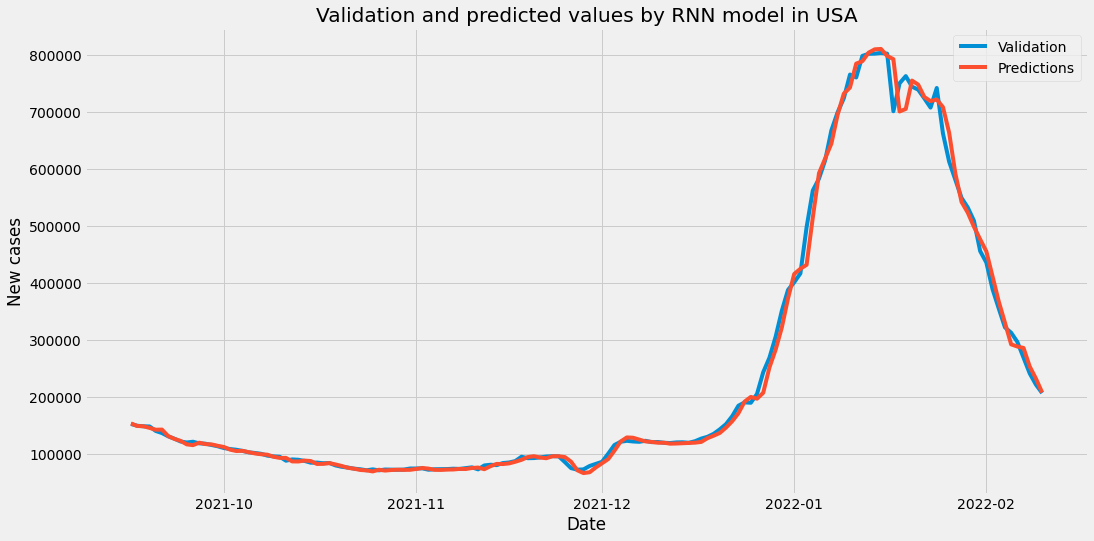

In [38]:
df_us_cut, model_us, valid_df_us = build_model(df_us, 'USA')

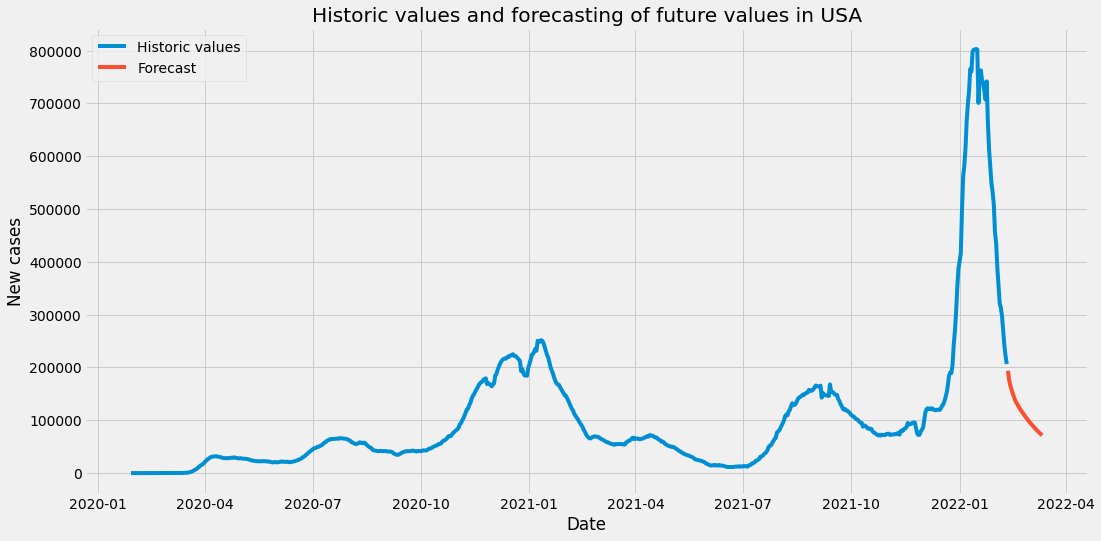

In [39]:
forecasting_us = future_values(model_us, df_us_cut, 30, 'USA')

Despite the complex scenario that the USA was experiencing two weeks ago we can expect the curve will continue decreasing considerably in the following weeks and possibly increase again because of the new Omicron subtype.

## Chile

RMSLE train set:  0.098
RMSLE validation set:  0.047


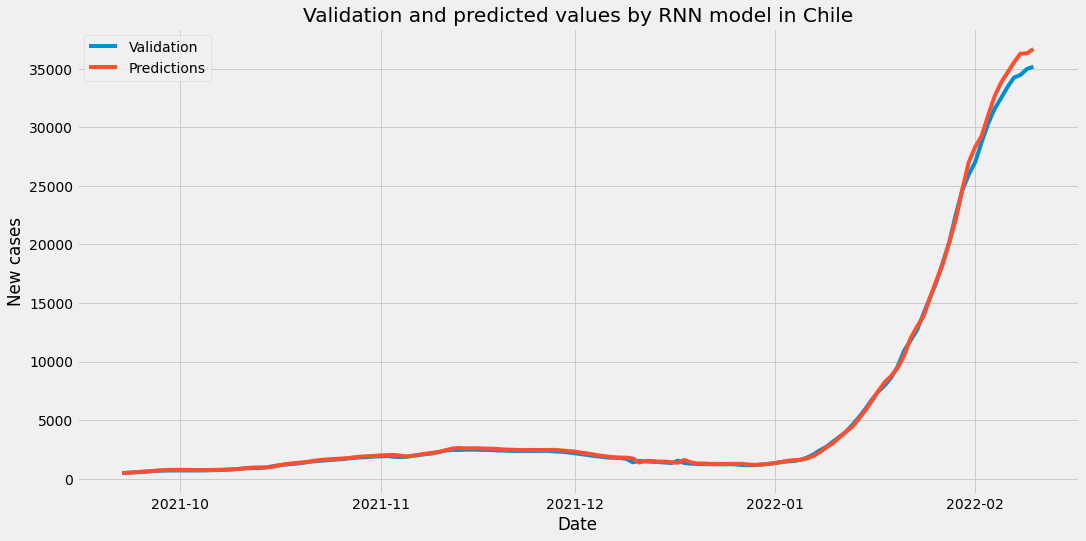

In [57]:
df_chile_cut, model_chile, valid_df_chile = build_model(df_chile, 'Chile')

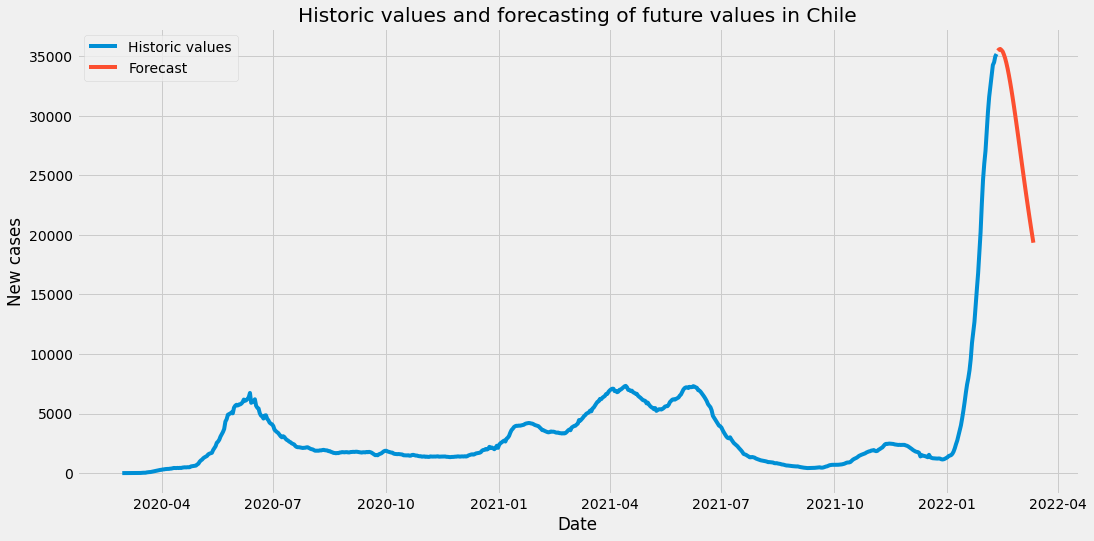

In [45]:
forecasting_chile = future_values(model_chile, df_chile_cut, 30, 'Chile')

As we predicted last week, Chile is experiencing the peak of Omicron in the current days and because of the high vaccination rate of the population we can be sure it will decrease just as we have seen in the previous countries.

By the way  another pretty interesting analysis nowadays is the behaviour in Denmark as we know it's the first european country to leave the restrictions, I encourage you all to keep track of how the pandemic evolves in such country as it definitely will become a sort of experiment to see what would happen with no restrictions. 

BBC News: *Denmark has lifted all of its domestic Covid-19 restrictions, including the wearing of face masks, making it the first European Union country to do so.*

By no means consider this forecasting will happen in real life exactly as the models predicted, this is only based on one variable and as I said earlier the experience and empirical evidence must be considered even more than what you have seen here. 

What I would have loved to do is applying exactly this models to features such as "number of ICU patients" or "number of medical/health staff infected", because these actually are the indicators that authorities are absolutely interested on, as an increase in both can mean a disaster in the health system of the entire country, unfortunately such data is not publicly available.

I encourage you to do exactly the same with other features that you can be interested on. I will be updating the dataset and the current project every week so everyone of us can keep tracking the behaviour in these countries and even in yours too!, if you are interested on this topic follow me to keep updated with the new versions of this work. If we confirm that these models work perfectly and future values predicted match with the values our authorities are giving every day we can be sure a new era of Machine Learning will begin.


# References:
- https://www.bbc.com/news/health-59999698
- https://english.elpais.com/usa/2022-01-03/omicron-the-fastest-spreading-virus-in-history.html
- https://www.sfchronicle.com/bayarea/article/Is-omicron-as-contagious-as-the-measles-Here-s-16717381.php
- https://www.nature.com/articles/s41598-021-87692-z
- https://www.nbcnews.com/science/science-news/know-ba2-newest-covid-omicron-variant-rcna13784
- https://www.bbc.com/news/world-europe-60215200
- Dr. John Campbell, Omicron has peaked in UK, Youtube.
- Dr. John Campbell, US hospital concerns, Youtube.
- Dr. John Campbell, Specialists now agree on endemic ending, Youtube.
- Dr. John Campbell, Omicron BA.2 will displace BA.1, Youtube.


Thank you!